In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
nhs = pd.read_csv('nhsDataFinal.csv')


In [3]:
df = pd.read_csv('BiBFullDataset.csv')

# create new dataframe with non-GDM women only
bib_gdm = df[df['gdm'] == 'Yes']
bib_nonGdm = df[df['gdm'] == 'No']

In [4]:
bib_gdm.shape

(848, 34)

In [5]:
bib_nonGdm.shape

(9744, 34)

In [6]:
nhs.shape

(196, 55)

# Test ANOVA assumptions

ANOVA Assumptions
- Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)
- homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)
- Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response
- The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. 

If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test, Brown-Forsythe test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.


In [25]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from bioinfokit.analys import stat

# ANOVA model
res = stat()
res.anova_stat(df=df_sewing, res_var='Training', anova_model='Time ~ C(Training)')

# Residual Distribution
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

# if the p value is non significant, we fail to reject null hypothesis and conclude that data is drawn from normal distribution.

As the data is drawn from normal distribution, use Bartlett’s test to check the Homogeneity of variances. Null hypothesis: samples from populations have equal variances.



In [ ]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'], df['D'])
print(w, pvalue)


# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='treatments')
res.bartlett_summary

# If the p value is non significant, we fail to reject null hypothesis and conclude that treatments have equal variances.

Levene’s test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.



In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

In [43]:
df

,nhs,bib-GDM,bib-nonGDM
0,32.0,NaN,41.0
1,20.0,NaN,21.0
2,32.0,NaN,33.0
3,30.0,NaN,36.0
4,39.0,NaN,24.0
...,...,...,...
12936,NaN,NaN,35.0
12948,NaN,NaN,35.0
12954,NaN,NaN,30.0
12958,NaN,NaN,27.0


In [54]:
import pandas as pd
# load data file
df = pd.concat([nhs['maternalAgeAtBirth'], bib_gdm['maternalAge'], bib_nonGdm['maternalAge']], axis=1, keys=['nhs', 'bib-GDM', 'bib-nonGDM'])
df

,nhs,bib-GDM,bib-nonGDM
0,32.0,NaN,41.0
1,20.0,NaN,21.0
2,32.0,NaN,33.0
3,30.0,NaN,36.0
4,39.0,NaN,24.0
...,...,...,...
12936,NaN,NaN,35.0
12948,NaN,NaN,35.0
12954,NaN,NaN,30.0
12958,NaN,NaN,27.0


In [55]:
df

,nhs,bib-GDM,bib-nonGDM
0,32.0,NaN,41.0
1,20.0,NaN,21.0
2,32.0,NaN,33.0
3,30.0,NaN,36.0
4,39.0,NaN,24.0
...,...,...,...
12936,NaN,NaN,35.0
12948,NaN,NaN,35.0
12954,NaN,NaN,30.0
12958,NaN,NaN,27.0


In [56]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['nhs', 'bib-GDM', 'bib-nonGDM'])

# replace column names
df_melt.columns = ['index', 'dataset', 'value']

In [39]:
df_melt = df_melt.dropna()
df_melt

,index,dataset,value
0,0,nhs,32.0
1,1,nhs,20.0
2,2,nhs,32.0
3,3,nhs,30.0
4,4,nhs,39.0
...,...,...,...
31819,12936,bib-nonGDM,35.0
31820,12948,bib-nonGDM,35.0
31821,12954,bib-nonGDM,30.0
31822,12958,bib-nonGDM,27.0


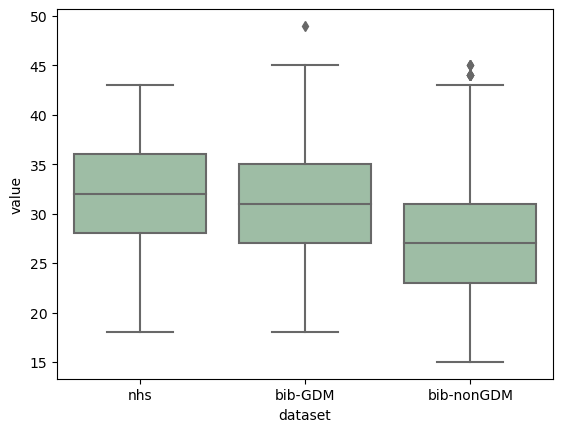

In [60]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='dataset', y='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="dataset", y="value", data=df_melt, color='#7d0013')
plt.show()

In [61]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['nhs'].dropna(), df['bib-GDM'].dropna(), df['bib-nonGDM'].dropna())
print(fvalue, pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(dataset)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

200.51561053468689 3.1418068228637043e-86


,sum_sq,df,F,PR(>F)
C(dataset),12299.428294,2.0,200.515611,3.141807e-86
Residual,330770.591358,10785.0,NaN,NaN


In [62]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(dataset)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(dataset),2.0,12299.428294,6149.714147,200.515611,3.141807e-86
Residual,10785.0,330770.591358,30.669503,NaN,NaN


In [63]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='dataset', anova_model='value ~ C(dataset)')
res.tukey_summary

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,nhs,bib-GDM,1.392304,0.363479,2.421128,4.486124,0.004331
1,nhs,bib-nonGDM,4.696868,3.760356,5.633381,16.625454,0.001000
2,bib-GDM,bib-nonGDM,3.304565,2.839793,3.769336,23.569669,0.001000


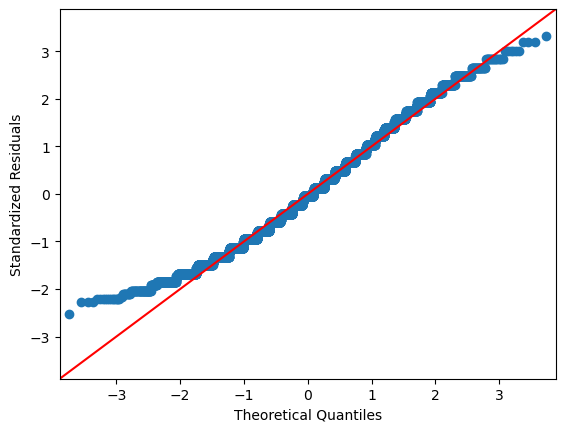

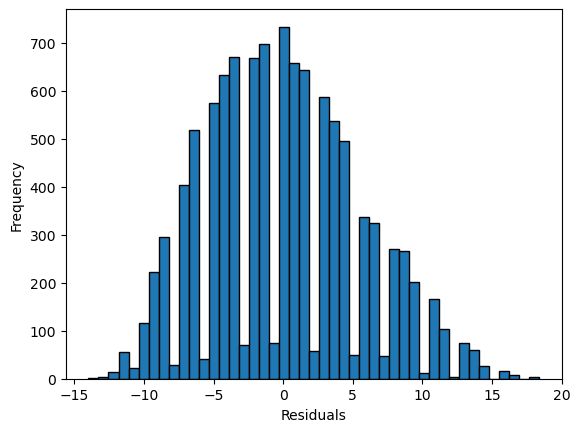

In [47]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [48]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9867603778839111 1.8488944393236116e-30


/Users/ssabouni/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
import scipy.stats as stats
w, pvalue = stats.bartlett(df['nhs'], df['bib-GDM'], df['bib-nonGDM'])
print(w, pvalue)

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='dataset')
res.bartlett_summary

17.20248063230048 0.00018387758583252793


,Parameter,Value
0,Test statistics (T),0.5198
1,Degrees of freedom (Df),2.0000
2,p value,0.7711


In [52]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='dataset')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.0521
1,Degrees of freedom (Df),2.0000
2,p value,0.9493


# ANOVA followed by multiple pairwise comparison (post hoc comparison) 

## Maternal Age

In [7]:
import scipy.stats as stats


# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maternalAgeAtBirth'], bib_gdm['maternalAge'], bib_nonGdm['maternalAge'])
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['maternalAge'], bib_nonGdm['maternalAge']))
print(stats.ttest_ind(nhs['maternalAgeAtBirth'], bib_gdm['maternalAge']))
print(stats.ttest_ind(nhs['maternalAgeAtBirth'], bib_nonGdm['maternalAge']))



200.51561053468689 3.1418068228637043e-86
ANOVA P-value is significant
Ttest_indResult(statistic=16.655671938398914, pvalue=1.6626307508269346e-61)
Ttest_indResult(statistic=3.2005139064919668, pvalue=0.0014132820178695293)
Ttest_indResult(statistic=11.75307931842014, pvalue=1.103144800520243e-31)


## Parity

In [8]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['parity'].dropna(), bib_gdm['parity'].dropna() , bib_nonGdm['parity'].dropna() )
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['parity'].dropna(), bib_nonGdm['parity'].dropna()))
print(stats.ttest_ind(nhs['parity'].dropna(), bib_gdm['parity'].dropna()))
print(stats.ttest_ind(nhs['parity'].dropna(), bib_nonGdm['parity'].dropna()))



72.0417686101745 8.467495541606274e-32
ANOVA P-value is significant
Ttest_indResult(statistic=11.328107155186242, pvalue=1.430756431092064e-29)
Ttest_indResult(statistic=-0.8223101587580213, pvalue=0.411093335725897)
Ttest_indResult(statistic=4.6754205044564525, pvalue=2.973678169799313e-06)


## Booking Weight

In [9]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maternalWeightAtBooking'].dropna(), bib_gdm['bookingWeight'].dropna(), bib_nonGdm['bookingWeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['bookingWeight'].dropna(), bib_nonGdm['bookingWeight'].dropna()))
print(stats.ttest_ind(nhs['maternalWeightAtBooking'].dropna(), bib_gdm['bookingWeight'].dropna()))
print(stats.ttest_ind(nhs['maternalWeightAtBooking'].dropna(), bib_nonGdm['bookingWeight'].dropna()))

52.67981704997891 1.7207479096088986e-23
ANOVA P-value is significant
Ttest_indResult(statistic=7.933455950164312, pvalue=2.352998551289072e-15)
Ttest_indResult(statistic=2.4449632463422564, pvalue=0.014656332853371085)
Ttest_indResult(statistic=6.856757285399371, pvalue=7.475408241175878e-12)


## Booking BMI

In [10]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maternalBMIAtBooking'].dropna(), bib_gdm['bookingBMI'].dropna(), bib_nonGdm['bookingBMI'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['bookingBMI'].dropna(), bib_nonGdm['bookingBMI'].dropna()))
print(stats.ttest_ind(nhs['maternalBMIAtBooking'].dropna(), bib_gdm['bookingBMI'].dropna()))
print(stats.ttest_ind(nhs['maternalBMIAtBooking'].dropna(), bib_nonGdm['bookingBMI'].dropna()))

100.46826547554149 6.340015501142879e-44
ANOVA P-value is significant
Ttest_indResult(statistic=11.700043539846757, pvalue=2.0647449120289695e-31)
Ttest_indResult(statistic=2.0137556745192735, pvalue=0.04431409817064242)
Ttest_indResult(statistic=8.518781753334364, pvalue=1.8668912079406573e-17)


## Maternal Height

In [11]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maternalHeight'].dropna(), bib_gdm['maternalHeight'].dropna(), bib_nonGdm['maternalHeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['maternalHeight'].dropna(), bib_nonGdm['maternalHeight'].dropna()))
print(stats.ttest_ind(nhs['maternalHeight'].dropna(), bib_gdm['maternalHeight'].dropna()))
print(stats.ttest_ind(nhs['maternalHeight'].dropna(), bib_nonGdm['maternalHeight'].dropna()))

50.82988698971816 1.0811280733225215e-22
ANOVA P-value is significant
Ttest_indResult(statistic=-9.38429519585713, pvalue=7.709400157159882e-21)
Ttest_indResult(statistic=0.5699562688902845, pvalue=0.568837327741224)
Ttest_indResult(statistic=-4.1463921683250975, pvalue=3.407115328408846e-05)


## Third Trimester Weight

In [12]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maternalWeight3rdTrimester'].dropna(), bib_gdm['thirdTrimesterWeight'].dropna(), bib_nonGdm['thirdTrimesterWeight'].dropna())
print(fvalue, pvalue)


if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['thirdTrimesterWeight'].dropna(), bib_nonGdm['thirdTrimesterWeight'].dropna()))
print(stats.ttest_ind(nhs['maternalWeight3rdTrimester'].dropna(), bib_gdm['thirdTrimesterWeight'].dropna()))
print(stats.ttest_ind(nhs['maternalWeight3rdTrimester'].dropna(), bib_nonGdm['thirdTrimesterWeight'].dropna()))

12.66976460922356 3.2248772955722425e-06
ANOVA P-value is significant
Ttest_indResult(statistic=2.1127130896154114, pvalue=0.03466538628441106)
Ttest_indResult(statistic=2.18803377002643, pvalue=0.02917062010175143)
Ttest_indResult(statistic=4.6428341171523915, pvalue=3.508592781197755e-06)


## OGTT Fasting

In [13]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['OGTTfasting'].dropna(), bib_gdm['fastingGlucose'].dropna(), bib_nonGdm['fastingGlucose'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")
    
print(stats.ttest_ind(bib_gdm['fastingGlucose'].dropna(), bib_nonGdm['fastingGlucose'].dropna()))
print(stats.ttest_ind(nhs['OGTTfasting'].dropna(), bib_gdm['fastingGlucose'].dropna()))
print(stats.ttest_ind(nhs['OGTTfasting'].dropna(), bib_nonGdm['fastingGlucose'].dropna()))

1083.4143627275932 0.0
ANOVA P-value is significant
Ttest_indResult(statistic=42.68912060141133, pvalue=0.0)
Ttest_indResult(statistic=0.5634295756350205, pvalue=0.5732655155243206)
Ttest_indResult(statistic=26.766933850908643, pvalue=2.4503820237963165e-152)


## OGTT 2 hour


In [14]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['OGTT2hour'].dropna(), bib_gdm['postGlucose'].dropna(), bib_nonGdm['postGlucose'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['postGlucose'].dropna(), bib_nonGdm['postGlucose'].dropna()))
print(stats.ttest_ind(nhs['OGTT2hour'].dropna(), bib_gdm['postGlucose'].dropna()))
print(stats.ttest_ind(nhs['OGTT2hour'].dropna(), bib_nonGdm['postGlucose'].dropna()))

4179.582924270982 0.0
ANOVA P-value is significant
Ttest_indResult(statistic=83.26817025507142, pvalue=0.0)
Ttest_indResult(statistic=0.7335699006131982, pvalue=0.46337849426069955)
Ttest_indResult(statistic=46.590567315986405, pvalue=0.0)


## Mean Foetal AC 


In [15]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['meanAC'].dropna(), bib_gdm['meanAbdomCirc'].dropna(), bib_nonGdm['meanAbdomCirc'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['meanAbdomCirc'].dropna(), bib_nonGdm['meanAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['meanAC'].dropna(), bib_gdm['meanAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['meanAC'].dropna(), bib_nonGdm['meanAbdomCirc'].dropna()))

378.7790098891599 1.5191878749245366e-154
ANOVA P-value is significant
Ttest_indResult(statistic=27.557955140822152, pvalue=4.85623344536989e-156)
Ttest_indResult(statistic=4.608242498413068, pvalue=4.583282418505549e-06)
Ttest_indResult(statistic=18.148313015205794, pvalue=4.175789471305625e-71)


## Max Foetal AC 


In [16]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maxAC'].dropna(), bib_gdm['maxAbdomCirc'].dropna(), bib_nonGdm['maxAbdomCirc'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['maxAbdomCirc'].dropna(), bib_nonGdm['maxAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['maxAC'].dropna(), bib_gdm['maxAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['maxAC'].dropna(), bib_nonGdm['maxAbdomCirc'].dropna()))

171.15596835543852 9.038454784985278e-73
ANOVA P-value is significant
Ttest_indResult(statistic=19.88991817145314, pvalue=7.238018454894017e-85)
Ttest_indResult(statistic=5.714346868388638, pvalue=1.4508431264310763e-08)
Ttest_indResult(statistic=16.053021088572088, pvalue=1.9218477910970315e-56)


## Min Foetal AC

In [17]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['minAC'].dropna(), bib_gdm['minAbdomCirc'].dropna(), bib_nonGdm['minAbdomCirc'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['minAbdomCirc'].dropna(), bib_nonGdm['minAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['minAC'].dropna(), bib_gdm['minAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['minAC'].dropna(), bib_nonGdm['minAbdomCirc'].dropna()))

50.804729387321316 1.3910681467950277e-22
ANOVA P-value is significant
Ttest_indResult(statistic=10.080193049228738, pvalue=1.1206671783731473e-23)
Ttest_indResult(statistic=-2.0518508153815205, pvalue=0.04044309689967425)
Ttest_indResult(statistic=2.499424490845921, pvalue=0.012474680777440206)


## Var Foetal AC 

In [18]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['varAC'].dropna(), bib_gdm['varAbdomCirc'].dropna(), bib_nonGdm['varAbdomCirc'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['varAbdomCirc'].dropna(), bib_nonGdm['varAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['varAC'].dropna(), bib_gdm['varAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['varAC'].dropna(), bib_nonGdm['varAbdomCirc'].dropna()))

84.75709399080375 5.800568400423031e-37
ANOVA P-value is significant
Ttest_indResult(statistic=-13.37574442831198, pvalue=3.906652871264729e-40)
Ttest_indResult(statistic=5.295565459906744, pvalue=1.4579435484614605e-07)
Ttest_indResult(statistic=11.874793168478687, pvalue=4.769367366929516e-32)


## Range Foetal AC 


In [19]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['rangeAC'].dropna(), bib_gdm['rangeAbdomCirc'].dropna(), bib_nonGdm['rangeAbdomCirc'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['rangeAbdomCirc'].dropna(), bib_nonGdm['rangeAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['rangeAC'].dropna(), bib_gdm['rangeAbdomCirc'].dropna()))
print(stats.ttest_ind(nhs['rangeAC'].dropna(), bib_nonGdm['rangeAbdomCirc'].dropna()))

126.72116627504975 1.7115795125342286e-54
ANOVA P-value is significant
Ttest_indResult(statistic=8.01803147634211, pvalue=1.3198266129671479e-15)
Ttest_indResult(statistic=6.037209982742527, pvalue=2.2043493831492845e-09)
Ttest_indResult(statistic=14.74305584097341, pvalue=4.382309210475125e-48)


## Mean EFW (g)


In [20]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['meanEFW'].dropna(), bib_gdm['meanFoetalWeight'].dropna(), bib_nonGdm['meanFoetalWeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['meanFoetalWeight'].dropna(), bib_nonGdm['meanFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['meanEFW'].dropna(), bib_gdm['meanFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['meanEFW'].dropna(), bib_nonGdm['meanFoetalWeight'].dropna()))

424.7764928269454 7.383907360001639e-172
ANOVA P-value is significant
Ttest_indResult(statistic=26.50771224835475, pvalue=3.400177248673756e-145)
Ttest_indResult(statistic=0.0359060205455634, pvalue=0.9713644326471151)
Ttest_indResult(statistic=13.613853585173779, pvalue=2.1634008418925818e-41)


## Max EFW (g)

In [21]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['maxEFW'].dropna(), bib_gdm['maxFoetalWeight'].dropna(), bib_nonGdm['maxFoetalWeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['maxFoetalWeight'].dropna(), bib_nonGdm['maxFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['maxEFW'].dropna(), bib_gdm['maxFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['maxEFW'].dropna(), bib_nonGdm['maxFoetalWeight'].dropna()))

340.4747239229682 7.446507266545702e-140
ANOVA P-value is significant
Ttest_indResult(statistic=22.51602829600749, pvalue=3.9785713148785387e-107)
Ttest_indResult(statistic=3.928353846752038, pvalue=9.137960636830705e-05)
Ttest_indResult(statistic=13.849024990726663, pvalue=9.594013108484067e-43)


## Min EFW (g)

In [22]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['minEFW'].dropna(), bib_gdm['minFoetalWeight'].dropna(), bib_nonGdm['minFoetalWeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")

print(stats.ttest_ind(bib_gdm['minFoetalWeight'].dropna(), bib_nonGdm['minFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['minEFW'].dropna(), bib_gdm['minFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['minEFW'].dropna(), bib_nonGdm['minFoetalWeight'].dropna()))

55.213167392508026 1.849530096031253e-24
ANOVA P-value is significant
Ttest_indResult(statistic=10.365030986847133, pvalue=6.301848399087543e-25)
Ttest_indResult(statistic=-1.4496000856108544, pvalue=0.14748235439249938)
Ttest_indResult(statistic=3.519212282541474, pvalue=0.00043711046697644476)


## Var EFW (g) 

In [23]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['varEFW'].dropna(), bib_gdm['varFoetalWeight'].dropna(), bib_nonGdm['varFoetalWeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['varFoetalWeight'].dropna(), bib_nonGdm['varFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['varEFW'].dropna(), bib_gdm['varFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['varEFW'].dropna(), bib_nonGdm['varFoetalWeight'].dropna()))

40.851370002429945 2.4748952346079284e-18
ANOVA P-value is significant
Ttest_indResult(statistic=-8.840484619817857, pvalue=1.2902757251725637e-18)
Ttest_indResult(statistic=4.11346167663129, pvalue=4.2171217594078206e-05)
Ttest_indResult(statistic=-1.9273017326937025, pvalue=0.05400488671871952)


## Range EFW (g)

In [24]:
# Perform the ANOVA
fvalue, pvalue = stats.f_oneway(nhs['rangeEFW'].dropna(), bib_gdm['rangeFoetalWeight'].dropna(), bib_nonGdm['rangeFoetalWeight'].dropna())
print(fvalue, pvalue)

if (pvalue<0.05):
    print("ANOVA P-value is significant")


print(stats.ttest_ind(bib_gdm['rangeFoetalWeight'].dropna(), bib_nonGdm['rangeFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['rangeEFW'].dropna(), bib_gdm['rangeFoetalWeight'].dropna()))
print(stats.ttest_ind(nhs['rangeEFW'].dropna(), bib_nonGdm['rangeFoetalWeight'].dropna()))

150.40600593963896 2.8975091280683798e-64
ANOVA P-value is significant
Ttest_indResult(statistic=14.139605002593646, pvalue=1.480505672953571e-44)
Ttest_indResult(statistic=3.715621091824535, pvalue=0.00021388869693890586)
Ttest_indResult(statistic=10.938671739926935, pvalue=1.6659032751665974e-27)
